2021-05-11 <br/>
US Broadband <br/>
https://github.com/rfordatascience/tidytuesday/blob/master/data/2021/2021-05-11/readme.md

Modified RapidInsights EDA - Completed <br/>
Choropleth map (hidden) - Completed <br/>


In [1]:

#imports and basic outlines

import pandas as pd
import matplotlib.pyplot as plt 

import seaborn as sns


%matplotlib inline




In [2]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_colwidth', 200)

import warnings
warnings.filterwarnings("ignore")

import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.io as pio

from IPython.display import HTML

In [3]:
#pio.templates['plotly_dark'].layout.colorway = ('#0840D9','#882775','#00A34C','#B86200','#AA250E','#1D8682')

### Read the data

In [4]:
df_broadband=pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-05-11/broadband.csv")

In [5]:
df_broadband.head()

,ST,COUNTY ID,COUNTY NAME,BROADBAND AVAILABILITY PER FCC,BROADBAND USAGE
0,AL,1001,Autauga County,0.81,0.28
1,AL,1003,Baldwin County,0.88,0.30
2,AL,1005,Barbour County,0.59,0.18
3,AL,1007,Bibb County,0.29,0.07
4,AL,1009,Blount County,0.69,0.09


In [6]:
#df_broadband.memory_usage(index=True).sum()

In [7]:
df_broadband_zip=pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-05-11/broadband_zip.csv")

In [8]:
df_broadband_zip.head()

,ST,COUNTY NAME,COUNTY ID,POSTAL CODE,BROADBAND USAGE,ERROR RANGE (MAE)(+/-),ERROR RANGE (95%)(+/-),MSD
0,SC,Abbeville,45001,29639,0.948,0.034,0.110,0.002
1,SC,Abbeville,45001,29620,0.398,0.002,0.007,0.000
2,SC,Abbeville,45001,29659,0.206,0.152,0.608,0.043
3,SC,Abbeville,45001,29638,0.369,0.010,0.031,-0.001
4,SC,Abbeville,45001,29628,0.221,0.014,0.043,0.000


In [9]:
# df_broadband_zip.memory_usage(index=True).sum()

In [10]:
url = 'https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json'
geo = pd.read_json(url)
geo.head()

,type,features
0,FeatureCollection,"{'type': 'Feature', 'properties': {'GEO_ID': '0500000US01001', 'STATE': '01', 'COUNTY': '001', 'NAME': 'Autauga', 'LSAD': 'County', 'CENSUSAREA': 594.436}, 'geometry': {'type': 'Polygon', 'coordin..."
1,FeatureCollection,"{'type': 'Feature', 'properties': {'GEO_ID': '0500000US01009', 'STATE': '01', 'COUNTY': '009', 'NAME': 'Blount', 'LSAD': 'County', 'CENSUSAREA': 644.776}, 'geometry': {'type': 'Polygon', 'coordina..."
2,FeatureCollection,"{'type': 'Feature', 'properties': {'GEO_ID': '0500000US01017', 'STATE': '01', 'COUNTY': '017', 'NAME': 'Chambers', 'LSAD': 'County', 'CENSUSAREA': 596.531}, 'geometry': {'type': 'Polygon', 'coordi..."
3,FeatureCollection,"{'type': 'Feature', 'properties': {'GEO_ID': '0500000US01021', 'STATE': '01', 'COUNTY': '021', 'NAME': 'Chilton', 'LSAD': 'County', 'CENSUSAREA': 692.854}, 'geometry': {'type': 'Polygon', 'coordin..."
4,FeatureCollection,"{'type': 'Feature', 'properties': {'GEO_ID': '0500000US01033', 'STATE': '01', 'COUNTY': '033', 'NAME': 'Colbert', 'LSAD': 'County', 'CENSUSAREA': 592.619}, 'geometry': {'type': 'Polygon', 'coordin..."


In [11]:
geo.memory_usage(index=True).sum()

51664

In [12]:
geo.features[0]

{'type': 'Feature',
 'properties': {'GEO_ID': '0500000US01001',
  'STATE': '01',
  'COUNTY': '001',
  'NAME': 'Autauga',
  'LSAD': 'County',
  'CENSUSAREA': 594.436},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-86.496774, 32.344437],
    [-86.717897, 32.402814],
    [-86.814912, 32.340803],
    [-86.890581, 32.502974],
    [-86.917595, 32.664169],
    [-86.71339, 32.661732],
    [-86.714219, 32.705694],
    [-86.413116, 32.707386],
    [-86.411172, 32.409937],
    [-86.496774, 32.344437]]]},
 'id': '01001'}

In [13]:
df_broadband['COUNTY ID'][0].dtype

dtype('int64')

In [14]:
# df_broadband[df_broadband['COUNTY ID']==01001]

In [15]:
# geo[geo['NAME']=='New Jersey'].head()

### Preliminary Insights

In [16]:
df_broadband.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ST                              3143 non-null   object
 1   COUNTY ID                       3143 non-null   int64 
 2   COUNTY NAME                     3143 non-null   object
 3   BROADBAND AVAILABILITY PER FCC  3143 non-null   object
 4   BROADBAND USAGE                 3143 non-null   object
dtypes: int64(1), object(4)
memory usage: 122.9+ KB


In [17]:
df_broadband_zip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32735 entries, 0 to 32734
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ST                      32735 non-null  object 
 1   COUNTY NAME             32735 non-null  object 
 2   COUNTY ID               32735 non-null  int64  
 3   POSTAL CODE             32735 non-null  int64  
 4   BROADBAND USAGE         32735 non-null  float64
 5   ERROR RANGE (MAE)(+/-)  32735 non-null  float64
 6   ERROR RANGE (95%)(+/-)  32735 non-null  float64
 7   MSD                     32735 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 2.0+ MB


<AxesSubplot:xlabel='BROADBAND USAGE', ylabel='Count'>

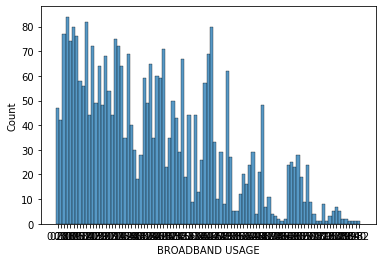

In [18]:
sns.histplot(df_broadband, x="BROADBAND USAGE")

In [19]:
# sns.histplot(df_broadband_zip, x="BROADBAND USAGE")

In [20]:
def check_duplicated(df):

    '''
    Helper function that highlights the duplicated values within the dataframe
    Arguments
    =========
    df: pandas dataframe

    Returns
    =======
    None 

    Shows the duplicated values present within the dataframe
    '''

    if len(df[df.duplicated()]) > 0:
        print("No. of duplicated entries: ", len(df[df.duplicated()]))
        print("### Duplicated values")
        print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)))
    else:
        print("No duplicated entries found")

In [21]:
check_duplicated(df_broadband)

No duplicated entries found


In [22]:
check_duplicated(df_broadband_zip)

No duplicated entries found


In [23]:
def missing_values_table(df):

    '''
    Helper function that provides information on the rows that contain missing values within the dataframe

    Arguments
    =========
    df: pandas dataframe
    
    Returns
    =======
    mis_val_table_ren_columns: A dataframe that contains the columns with missing values and how many are missing 
                               compared to the entire dataframe  

    '''

    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    
    # Print some summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns and a total of "+str(df.shape[0])+" values\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
                    
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [24]:
missing_values_table(df_broadband)

Your selected dataframe has 5 columns and a total of 3143 values
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [25]:
missing_values_table(df_broadband_zip)

Your selected dataframe has 8 columns and a total of 32735 values
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [26]:
def check_data_type(df):

    '''
    Helper function that shows the data type of the dataframe
    Arguments
    =========
    df: pandas dataframe
    
    Returns
    =======
    None

    Comments
    ========
    Shows the data type, the number of unique values and the first value (to validate the data type) of each column in the dataframe
    '''

    interesting= pd.DataFrame(df.dtypes,columns=["Data_Type"])
    interesting["First_value"]=df.iloc[0,:]
    unique_values= df.nunique()
    interesting["Unique_values"]=unique_values
    print(interesting)

In [27]:
check_data_type(df_broadband)

                               Data_Type     First_value  Unique_values
ST                                object              AL             51
COUNTY ID                          int64            1001           3143
COUNTY NAME                       object  Autauga County           1878
BROADBAND AVAILABILITY PER FCC    object            0.81            102
BROADBAND USAGE                   object            0.28             95


In [28]:
check_data_type(df_broadband_zip)

                       Data_Type First_value  Unique_values
ST                        object          SC             51
COUNTY NAME               object   Abbeville           1867
COUNTY ID                  int64       45001           3136
POSTAL CODE                int64       29639          32653
BROADBAND USAGE          float64       0.948           1001
ERROR RANGE (MAE)(+/-)   float64       0.034             21
ERROR RANGE (95%)(+/-)   float64        0.11             23
MSD                      float64       0.002             11


## Focusing on NJ

In [29]:
df_broadband_NJ=df_broadband[df_broadband["ST"]=="NJ"]
df_broadband_zip_NJ=df_broadband_zip[df_broadband_zip["ST"]=="NJ"]


In [30]:
df_broadband_NJ.head()

,ST,COUNTY ID,COUNTY NAME,BROADBAND AVAILABILITY PER FCC,BROADBAND USAGE
1774,NJ,34001,Atlantic County,0.98,0.62
1775,NJ,34003,Bergen County,1.00,0.78
1776,NJ,34005,Burlington County,0.98,0.75
1777,NJ,34007,Camden County,0.98,0.66
1778,NJ,34009,Cape May County,0.99,0.73


In [31]:
df_broadband_zip_NJ.head()

,ST,COUNTY NAME,COUNTY ID,POSTAL CODE,BROADBAND USAGE,ERROR RANGE (MAE)(+/-),ERROR RANGE (95%)(+/-),MSD
1077,NJ,Atlantic,34001,8232,0.499,0.002,0.007,0.000
1078,NJ,Atlantic,34001,8203,0.199,0.003,0.010,-0.001
1079,NJ,Atlantic,34001,8241,0.484,0.034,0.110,0.002
1080,NJ,Atlantic,34001,8225,0.572,0.004,0.013,0.000
1081,NJ,Atlantic,34001,8350,0.164,0.034,0.110,0.002


In [32]:
# fig = px.choropleth_mapbox(df_broadband_NJ, geojason=counties, location='COUNTY NAME', color='BROADBAND USAGE',
#                            color_continuous_scale="Viridis",
#                            range_color=(0, 12),
#                            mapbox_style="carto-positron",
#                            zoom=3, #center = {"lat": 37.0902, "lon": -95.7129},
#                            opacity=0.5,
#                            labels={'BROADBAND USAGE':'BROADBAND USAGE'}
#                           )
# fig.show()

In [33]:
# fig = px.choropleth(
#     df_broadband_zip_NJ, 
#     locations="COUNTY ID",                    
#     color="BROADBAND USAGE",
#     hover_name="COUNTY NAME", # column to add to hover information
#     color_continuous_scale=px.colors.sequential.matter)
# fig.show()

In [34]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

In [35]:
type(counties)

dict

In [36]:
import sys
size = sys.getsizeof(counties)
size += sum(map(sys.getsizeof, counties.values())) + sum(map(sys.getsizeof, counties.keys()))
print(size)

26448


In [39]:
#counties[counties.properties.COUNTY=='counties']

In [40]:
#Code here viz takes a lot of memory space for some reason

# fig = px.choropleth_mapbox(df_broadband_NJ, geojson=counties, locations='COUNTY ID', color='BROADBAND USAGE',
#                            color_continuous_scale="Viridis",
#                            range_color=(0, 12),
#                            #mapbox_style="carto-positron",
#                            zoom=6, 
#                            center = {"lat": 40.0902, "lon": -74.7129},
#                            opacity=0.5
#                            #labels={'unemp':'unemployment rate'}
#                           )
# fig.show()

In [41]:
# img_bytes = fig.to_image(format="png")
# from IPython.display import Image
# Image(img_bytes)
